In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("DATA/training.csv")
data.head(5).style

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"More I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of types of accidents -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know. There appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


In [3]:
y_columns = data.columns[2:]
y_columns

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [4]:
from gensim.models import KeyedVectors
w2v = KeyedVectors.load_word2vec_format(
    fname="//Users/proffl/GoogleNews-vectors-negative300.bin", binary=True)
w2v['hello']

/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


array([-0.05419922,  0.01708984, -0.00527954,  0.33203125, -0.25      ,
       -0.01397705, -0.15039062, -0.265625  ,  0.01647949,  0.3828125 ,
       -0.03295898, -0.09716797, -0.16308594, -0.04443359,  0.00946045,
        0.18457031,  0.03637695,  0.16601562,  0.36328125, -0.25585938,
        0.375     ,  0.171875  ,  0.21386719, -0.19921875,  0.13085938,
       -0.07275391, -0.02819824,  0.11621094,  0.15332031,  0.09082031,
        0.06787109, -0.0300293 , -0.16894531, -0.20800781, -0.03710938,
       -0.22753906,  0.26367188,  0.012146  ,  0.18359375,  0.31054688,
       -0.10791016, -0.19140625,  0.21582031,  0.13183594, -0.03515625,
        0.18554688, -0.30859375,  0.04785156, -0.10986328,  0.14355469,
       -0.43554688, -0.0378418 ,  0.10839844,  0.140625  , -0.10595703,
        0.26171875, -0.17089844,  0.39453125,  0.12597656, -0.27734375,
       -0.28125   ,  0.14746094, -0.20996094,  0.02355957,  0.18457031,
        0.00445557, -0.27929688, -0.03637695, -0.29296875,  0.19

In [5]:
def remove_strip(str):
    return str.replace("\r", "").replace("\n", "").strip()

def get_stop_words(f, encoding='utf-8'):
    stop_words = []
    with open(f, "r", encoding=encoding) as f_stopwords:
        for line in f_stopwords:
            line = remove_strip(line)
            stop_words.append(line.lower())
    stop_words = set(stop_words)
    print("total counts: ", len(stop_words))

    return stop_words

In [6]:
stop_words = get_stop_words("stopwords.txt")
len(stop_words)

total counts:  233


233

In [7]:
data['comment_text_sw'] = data['comment_text'].apply(
    lambda text: " ".join([w for w in text.replace(",", "").replace("?", "").replace(".", "").replace("!", "").split() if w.lower() not in stop_words]))
data['comment_text_sw']

0         Explanation edits made username Hardcore Metal...
1         D'aww matches background colour seemingly stuc...
2         man really trying edit war guy constantly remo...
3         can't make real suggestions improvement wonder...
4                      sir hero chance remember page that's
                                ...                        
127652    numbers parentheses additional decimal points ...
127653       ashamed horrible thing put talk page 128611993
127654    Spitzer Umm theres actual article prostitution...
127655    looks like actually put speedy first version d...
127656    really think understand came idea bad right aw...
Name: comment_text_sw, Length: 127657, dtype: object

In [8]:
def sentence_to_word(sentence):
    word_count = 0
    sum_words = np.zeros(300)
    for word in sentence.split():
        word = word.strip()
        if word in w2v.key_to_index:
            sum_words = w2v[word] + sum_words
            word_count += 1
    if word_count > 0:
        sum_words = sum_words / word_count
    return sum_words

In [9]:
data['comment_vec'] = data['comment_text_sw'].map(sentence_to_word)
data_word2vec = pd.DataFrame(data['comment_vec'].tolist())
data_word2vec

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.016170,0.054041,0.008723,0.065613,-0.037635,-0.040747,-0.018361,-0.048341,0.084505,0.004627,...,0.003094,0.046640,-0.100409,0.064379,0.045702,-0.087487,0.027953,-0.106858,-0.008824,-0.032972
1,0.013672,0.071279,-0.039398,0.040609,-0.057129,0.006200,0.075378,-0.118815,0.052134,0.049622,...,-0.154256,0.079244,0.010628,0.028564,0.075724,-0.153402,-0.078532,0.034414,0.070435,0.023519
2,0.081226,0.062378,-0.008158,0.039550,-0.086282,0.070689,0.087277,-0.042075,0.069681,-0.035172,...,-0.043018,0.014528,-0.065814,0.019635,-0.080098,-0.048955,0.069958,-0.111234,0.003290,0.034442
3,0.012383,0.014619,0.036943,0.087166,-0.098782,-0.017439,0.054242,-0.042736,0.075439,0.024305,...,-0.051308,0.003052,-0.051037,0.020644,0.055660,-0.053549,0.034242,-0.125549,-0.001516,-0.011828
4,0.161540,0.058879,0.173024,0.180664,-0.045603,-0.006429,0.086690,-0.099447,0.104960,0.090093,...,0.030334,-0.028900,-0.177775,-0.012655,-0.027486,-0.120829,-0.041748,-0.121948,-0.008708,0.022003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127652,0.044643,0.013181,0.071257,0.097162,-0.095079,0.007715,0.034559,-0.023131,0.098224,0.092019,...,-0.026332,0.072760,-0.082231,-0.003951,-0.026439,0.048793,0.014121,-0.041830,-0.036802,-0.019561
127653,0.069867,0.088338,0.063371,0.054769,-0.027954,0.031840,0.154887,-0.057861,0.190267,0.066772,...,0.019246,0.121582,-0.150798,0.083577,-0.159383,-0.147664,-0.044474,-0.126322,0.042653,-0.054036
127654,0.043477,-0.024875,-0.086263,0.030362,-0.146620,0.105469,-0.007189,-0.077033,0.037815,0.094177,...,-0.020698,-0.024414,-0.040473,0.080753,-0.048191,0.044569,-0.018324,-0.091404,-0.147135,-0.044403
127655,0.017097,0.126302,0.057847,0.094198,-0.051073,-0.028998,0.099447,-0.005829,0.113953,0.076416,...,-0.041854,0.009006,0.011166,0.046495,0.065240,-0.024821,0.051866,-0.078274,-0.028307,-0.025798


In [10]:
# 保存词向量，方便使用
data_word2vec.to_csv("./DATA/training_vec.csv", index=None)

In [48]:
random_seed = 42
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from lightgbm.sklearn import LGBMClassifier
from sklearn.metrics import f1_score

models = []
i = 0
test_size = 0.33
X_train, X_valid, y_train, y_valid = train_test_split(
    data_word2vec, data[y_columns[i]], test_size=test_size, stratify=data[y_columns[i]], random_state=random_seed)
X_train

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
19342,0.099197,0.190674,0.021590,0.060811,0.054769,-0.088867,0.112274,-0.119914,0.079346,0.064819,...,-0.109131,0.003337,-0.117767,0.041565,-0.050173,0.089539,-0.092163,-0.112183,0.138804,0.008586
26435,0.065458,0.008771,0.010422,0.056048,-0.129584,0.002936,0.017648,-0.060471,0.156436,0.071867,...,-0.045100,0.062325,-0.109375,-0.024179,0.020745,-0.096464,0.027435,-0.033756,0.037328,-0.017438
59148,0.023877,0.045043,-0.004852,0.046195,-0.070198,0.006410,0.060228,-0.021553,0.142289,0.062154,...,-0.050459,0.011416,-0.057102,0.048687,-0.023334,-0.035901,0.023157,-0.095476,0.011501,0.008344
97325,-0.106543,0.110254,-0.123340,-0.025610,0.007349,-0.045947,0.142871,0.010791,0.080859,-0.023993,...,-0.080273,-0.105176,-0.013953,0.042041,0.075513,-0.174963,0.111890,-0.002563,-0.073096,-0.068506
80515,0.028351,0.075399,0.135037,0.078857,-0.156494,0.045817,0.007365,-0.046319,0.078328,-0.018365,...,0.058105,0.068387,-0.095318,0.011502,-0.031692,-0.114729,0.062995,-0.040409,0.002048,-0.011027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0.014221,-0.010061,-0.071289,-0.080566,-0.030330,-0.061882,-0.034944,-0.133537,0.065405,0.016570,...,-0.025293,-0.110262,-0.002504,0.036800,0.024343,-0.057019,-0.068270,0.042765,0.077612,-0.099731
104007,-0.057014,-0.014132,0.028564,0.053908,-0.094220,0.040156,0.075801,-0.021935,0.111272,0.001972,...,-0.103403,0.022513,-0.051532,-0.038753,-0.066249,-0.051870,0.013155,-0.139806,-0.123854,0.008334
92168,0.088862,0.048256,0.022404,0.081980,-0.089489,-0.014628,0.108927,-0.050814,0.043604,0.027070,...,-0.079612,0.050866,-0.061425,0.061433,-0.034974,-0.001198,0.035239,-0.048408,0.015377,0.023291
33385,-0.011505,0.101471,-0.030304,-0.110107,-0.097168,-0.032501,-0.023895,-0.033264,0.027924,-0.029709,...,-0.089859,0.006691,-0.189941,0.053688,-0.080383,-0.145081,0.085739,0.140991,0.078552,0.026669


In [49]:
rus = SMOTE()
X, y= rus.fit_resample(X_train, y_train)
X.shape

(154736, 300)

In [55]:
lgb =LGBMClassifier(max_depth=10, num_leaves=400, boosting_type='dart', random_state=random_seed)
lgb.fit(X, y)
y_train_pred = lgb.predict(X_train)
y_valid_pred = lgb.predict(X_valid)
print("train set f1 score: ", f1_score(y_train, y_train_pred))
print("training set %s f1_score: %.2f" % (y_columns[i], f1_score(y_valid, y_valid_pred) * 100))
models.append(lgb)

train set f1 score:  0.8877714538321269
training set toxic f1_score: 65.88


f1_score: 0.7585355820649938
[[109549   5926]
 [  1118  11064]]


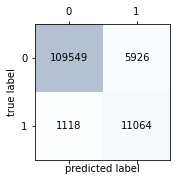

In [36]:
from sklearn.metrics import confusion_matrix
y_all_pred = lgb.predict(data_word2vec)
confmt = confusion_matrix(y_true=data[y_columns[i]], y_pred=y_all_pred)
print("f1_score:", f1_score(y_all_pred, data[y_columns[i]]))
print(confmt)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmt.shape[0]):
    for j in range(confmt.shape[1]):
        ax.text(x=j, y=i, s=confmt[i, j], va='center', ha='center')
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()


In [13]:
i = 1
rus = RandomUnderSampler(random_state=random_seed, )
X, y= rus.fit_resample(data_word2vec, data[y_columns[i]])
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=random_seed)
lgb =LGBMClassifier(max_depth=8, num_leaves=40, boosting_type='dart', random_state=random_seed)
lgb.fit(X_train, y_train)
y_train_pred = lgb.predict(X_train)
y_valid_pred = lgb.predict(X_valid)
print("train set f1 score: ", f1_score(y_train, y_train_pred))
print("training set %s f1_score: %.2f" % (y_columns[i], f1_score(y_valid, y_valid_pred) * 100))
models.append(lgb)

train set f1 score:  0.9973780807551127
training set severe_toxic f1_score: 93.99


In [14]:
i = 2
rus = RandomUnderSampler(random_state=random_seed, )
X, y= rus.fit_resample(data_word2vec, data[y_columns[i]])
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=random_seed)
lgb =LGBMClassifier(max_depth=10, num_leaves=80, boosting_type='dart', random_state=random_seed)
lgb.fit(X_train, y_train)
y_train_pred = lgb.predict(X_train)
y_valid_pred = lgb.predict(X_valid)
print("train set f1 score: ", f1_score(y_train, y_train_pred))
print("training set %s f1_score: %.2f" % (y_columns[i], f1_score(y_valid, y_valid_pred) * 100))
models.append(lgb)

train set f1 score:  0.9900600334612736
training set obscene f1_score: 89.13


In [15]:
i = 3
rus = RandomUnderSampler(random_state=random_seed, )
X, y= rus.fit_resample(data_word2vec, data[y_columns[i]])
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=random_seed)
lgb =LGBMClassifier(max_depth=6, num_leaves=40, boosting_type='dart', random_state=random_seed)
lgb.fit(X_train, y_train)
y_train_pred = lgb.predict(X_train)
y_valid_pred = lgb.predict(X_valid)
print("train set f1 score: ", f1_score(y_train, y_train_pred))
print("training set %s f1_score: %.2f" % (y_columns[i], f1_score(y_valid, y_valid_pred) * 100))
models.append(lgb)

train set f1 score:  1.0
training set threat f1_score: 92.71


In [16]:
i = 4
rus = RandomUnderSampler(random_state=random_seed, )
X, y= rus.fit_resample(data_word2vec, data[y_columns[i]])
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=random_seed)
lgb =LGBMClassifier(max_depth=7, num_leaves=40, boosting_type='dart', random_state=random_seed)
lgb.fit(X_train, y_train)
y_train_pred = lgb.predict(X_train)
y_valid_pred = lgb.predict(X_valid)
print("train set f1 score: ", f1_score(y_train, y_train_pred))
print("training set %s f1_score: %.2f" % (y_columns[i], f1_score(y_valid, y_valid_pred) * 100))
models.append(lgb)

train set f1 score:  0.9616724738675957
training set insult f1_score: 88.33


In [25]:
i = 5
rus = RandomUnderSampler(random_state=random_seed, )
X, y= rus.fit_resample(data_word2vec, data[y_columns[i]])
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=random_seed)
lgb =LGBMClassifier(max_depth=7, num_leaves=40, boosting_type='dart', random_state=random_seed)
lgb.fit(X_train, y_train)
y_train_pred = lgb.predict(X_train)
y_valid_pred = lgb.predict(X_valid)
print("train set f1 score: ", f1_score(y_train, y_train_pred))
print("training set %s f1_score: %.2f" % (y_columns[i], f1_score(y_valid, y_valid_pred) * 100))
models.append(lgb)

train set f1 score:  0.9970605526161082
training set identity_hate f1_score: 88.07


f1_score: 0.14248657778850213
[[112261  14121]
 [    94   1181]]


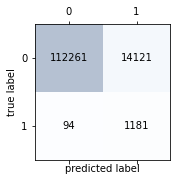

In [30]:
from sklearn.metrics import confusion_matrix
y_all_pred = lgb.predict(data_word2vec)
confmt = confusion_matrix(y_true=data[y_columns[i]], y_pred=y_all_pred)
print("f1_score:", f1_score(y_all_pred, data[y_columns[i]]))
print(confmt)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmt.shape[0]):
    for j in range(confmt.shape[1]):
        ax.text(x=j, y=i, s=confmt[i, j], va='center', ha='center')
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()

In [18]:
test = pd.read_csv("./DATA/test.csv", encoding='ISO8859-2')
test['comment_text_sw'] = test['comment_text'].apply(
    lambda text: " ".join([w for w in text.replace(",", "").replace("?", "").replace(".", "").replace("!", "").split() if w.lower() not in stop_words]))

In [21]:
test['comment_vec'] = test['comment_text_sw'].map(sentence_to_word)
test_word2vec = pd.DataFrame(test['comment_vec'].tolist())
result = test['id']
for (idx, column) in enumerate(y_columns):
    y_test = models[idx].predict(test_word2vec)
    result = pd.concat([result, pd.DataFrame(y_test, columns=[column], index=test.index)], axis=1)

In [22]:
# for y in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:
#     result[y] = result[y].map({0:'L', 1:'H'})
result.to_csv("方笠_results.csv", index=None)


